## Importing packages

## References and Motivation 
## https://www.kaggle.com/abdelwahed43/house-prices-prediction-competition?rvi=1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Train and test data sets

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

## Verifying the rows and columns in train and test datasets 

In [3]:
print('\n ',train.shape)



  (1460, 81)


## Test data set shape shown below speicfies that it is missing a row and a column(SalePrice which is to be predicted)

In [4]:
print('\n', test.shape)


 (1459, 80)


## Splitting The Train data set into numeric and categorical data sets for our understanding

In [5]:
numeric = train.select_dtypes(exclude = 'object')
Categorical = train.select_dtypes(include = 'object')
print('\n number of Numeric datasets are : ', len(numeric.axes[1]))
print('\n', numeric.columns.values)
print('\n number of Categorical datasets are :', len(Categorical.axes[1]))
print('\n', Categorical.columns.values)


 number of Numeric datasets are :  38

 ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']

 number of Categorical datasets are : 43

 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'Garage

In [6]:
numeric.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [7]:
Categorical.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


## Checking for missing values in numeric dataset

In [8]:
numeric.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

##  From above there are 3 variables having missing values with "LotFrontage" being the highest, and "MasVnrArea" being the least. 

## Checking for missing values in Categorical data set

In [9]:
Categorical.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

## Variables with very high missing values/ NAN/ NA in Categorical Data set

In [10]:
mv_cat = ['Alley','PoolQc','Fence','MiscFeature']
##
## 

## Since there are only 3 variables("LotFrontage", "MasVnrArea", "GarageyrBlt") i am using fillna(median) feature engineering to fill the missing values in order to get better correlations

In [11]:
med = numeric.median()
numeric_df = numeric.fillna(med)
numeric_df.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,69.0,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


## Manually coded function to check correlation between LotFrontage and SalePrice
## we can use this function to see corr coeff b/w suspected pairs clearly.
## please suggest how to improve this funct to calculate corr b/w all variables. other than using built in correlation matrix.

In [12]:
def correlation():
    sx = np.std(numeric_df['LotFrontage'])## Standard deviation of LotFrontage
    sy = np.std(numeric_df['SalePrice'])  ## Standard deviation of SalePrice
    n = numeric_df['Id'].count()
    
    mean_x = np.mean(numeric_df['LotFrontage'])
    mean_y = np.mean(numeric_df['SalePrice'])
    
    sigma_x = numeric_df['LotFrontage'] - mean_x ## Difference between observed value and mean of LotFrontage variable
    sigma_y = numeric_df['SalePrice'] - mean_y   ## Difference between observed value and mean of SalePrice variable
   
    ## Correlation coeff = [1/(no.of observations -1)] x [1/(std.deviation 0f 2 vars)] x 
    ## ['sum of {(observed value of var1 - mean of var1) x (observed value of var2 - mean of var2)]
    
    Correlation = (1/(n-1))*(1/(sx*sy))*((sigma_x)*(sigma_y))
    print('\n Correlation coeff between LotFrontage and SalePrice is :', Correlation.sum().round(5))

In [13]:
correlation()


 Correlation coeff between LotFrontage and SalePrice is : 0.335


## Correlation coefficient between Target(SalePrice) and variable using built in function"corr"

In [14]:
num_corr = numeric_df.corr()
tab = num_corr['SalePrice'].sort_values(ascending = False).to_frame()
corr_matrix = sns.light_palette('Skyblue', as_cmap = True)
tb = tab.style.background_gradient(cmap=corr_matrix)
tb

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


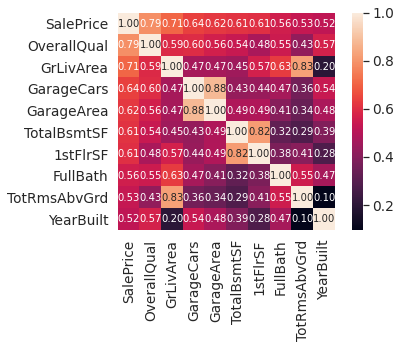

In [15]:
## ***used the code which is in google***

#saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = numeric_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index ## correlating with variables with SalePrice
cm = np.corrcoef(numeric_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Visualizing which pair provides more linear pattern based on correlation and SalePrice Predictability 

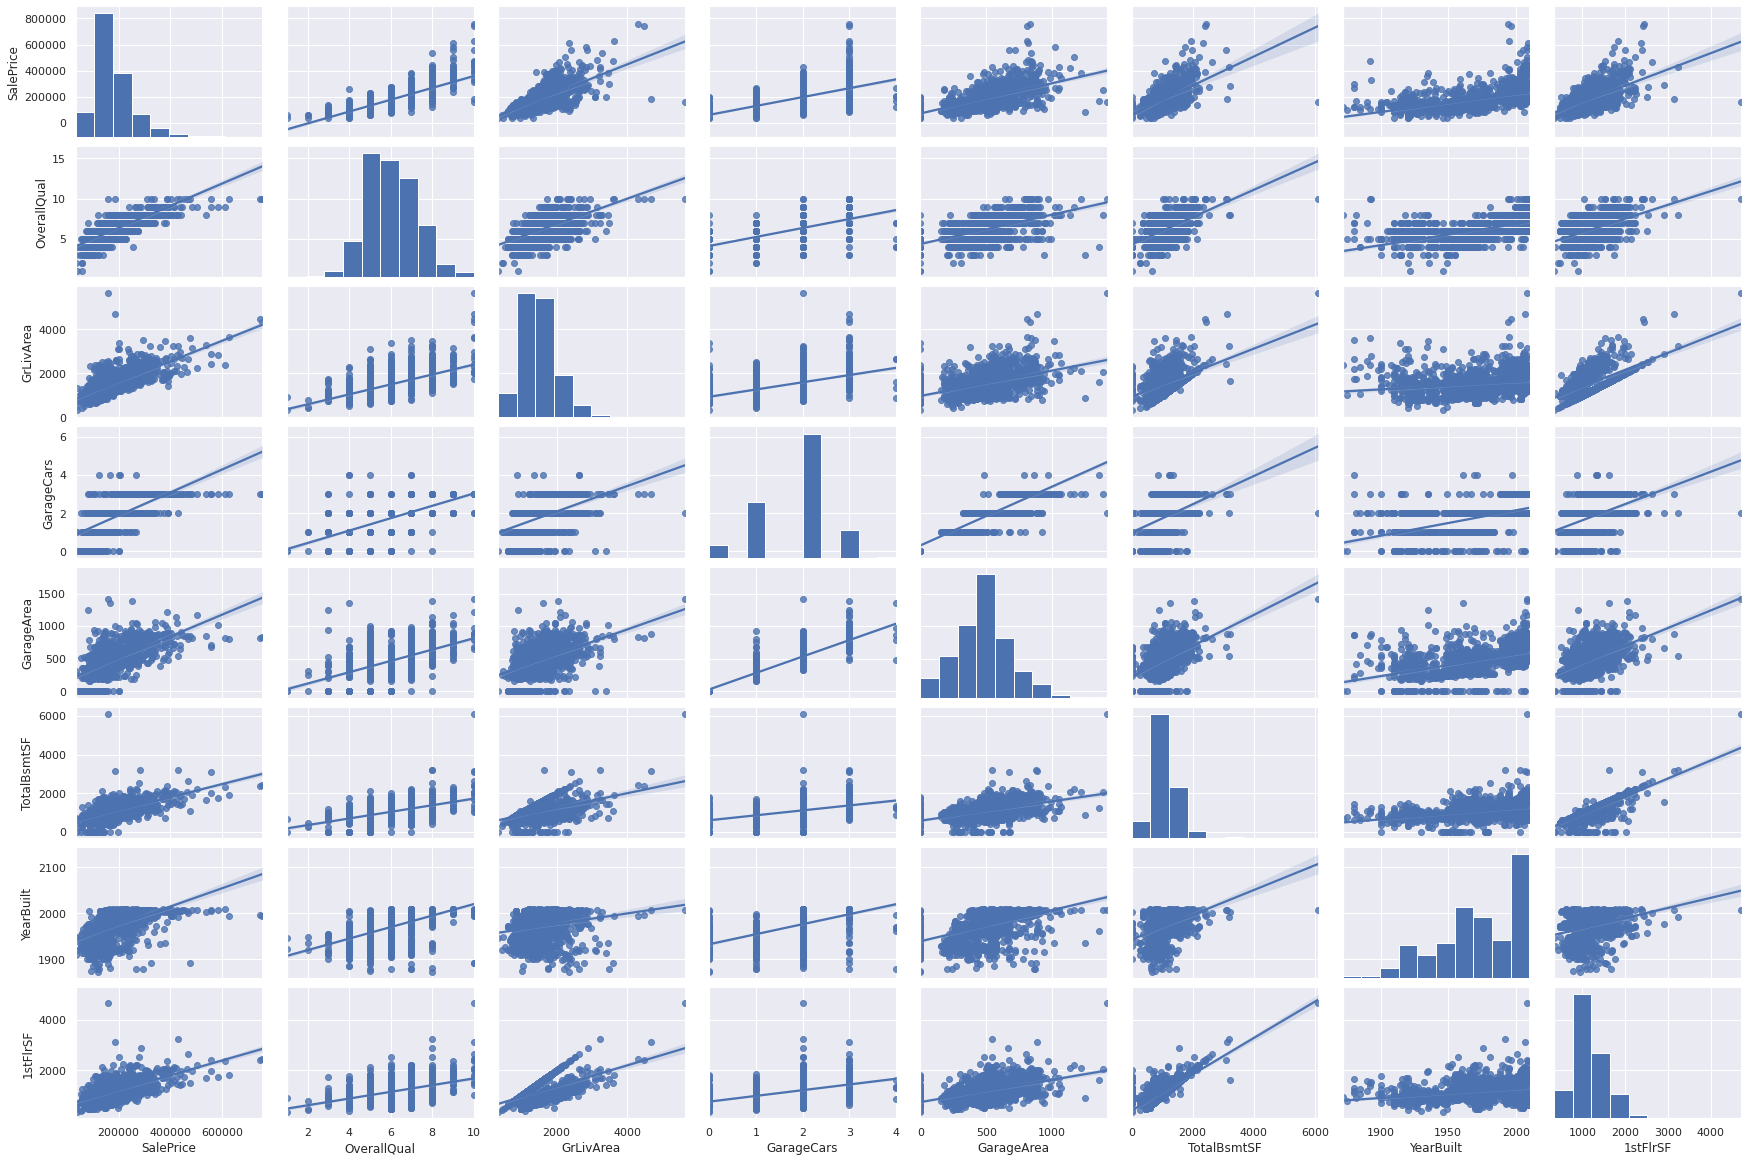

In [16]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','YearBuilt','1stFlrSF']
sns.set(color_codes = True)
sns.pairplot(numeric_df[cols], kind = 'reg', height = 2.0, aspect = 1.5,)


In [17]:
## There are outliers in Lot Frontage and MasVnrArea and Id and saleprice has negative correlation
## Increase in ID gives decrease in SalePrice and vice versa.
## verifying other pairs which have a better linearity with minimum correlation to prevent overfitting and increase in RMSE or RMLSe.


## working on visualization and outliers and working whether to remove them or refine them.



## Combining Train and Test Data Sets before cleaning the data

In [18]:
na = train.shape[0] ## no of rows of train data set
nb = test.shape[0]  ## no of rows of test data set

comb_data = pd.concat([train, test], sort = False).reset_index(drop = True)## merging train and test datasets

## setting the target variable to y_train 
y_train = comb_data['SalePrice'].to_frame()

## Dropping Target variables(SalePrice and Id)
comb_data.drop(['SalePrice','Id'], axis = 1, inplace = True)

print('\n Total Size of combined Train and Test dataset is : ', comb_data.shape)
print('\n No.of Rows in Train data set:', na)
print('\n No. of Rows in Test data set:', nb)



 Total Size of combined Train and Test dataset is :  (2919, 79)

 No.of Rows in Train data set: 1460

 No. of Rows in Test data set: 1459


In [19]:
pd.set_option('display.max_columns', None)
comb_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

In [20]:
def boxplots():
    y_train.boxplot()
def boxplot_comb():
    comb_data.boxplot(column = ['GrLivArea','TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'MasVnrArea','GarageArea','YearBuilt', 'FullBath',
                                'HalfBath'], fontsize = 15, figsize = (25,20))
    ## reason for plotting basement square feet is that it comes under area of house and possesing a high correlation with saleprice.
## Also any variable based on size, qual, and house accesories like full bath, half bath, garage, year built are potential predictors
## of house SalePrice. Hence outliers within them may compromise the model performance and may lead to overfit(if I am not wrong).
    

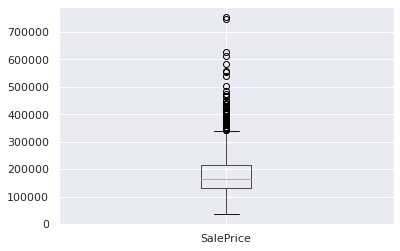

In [21]:
boxplots()

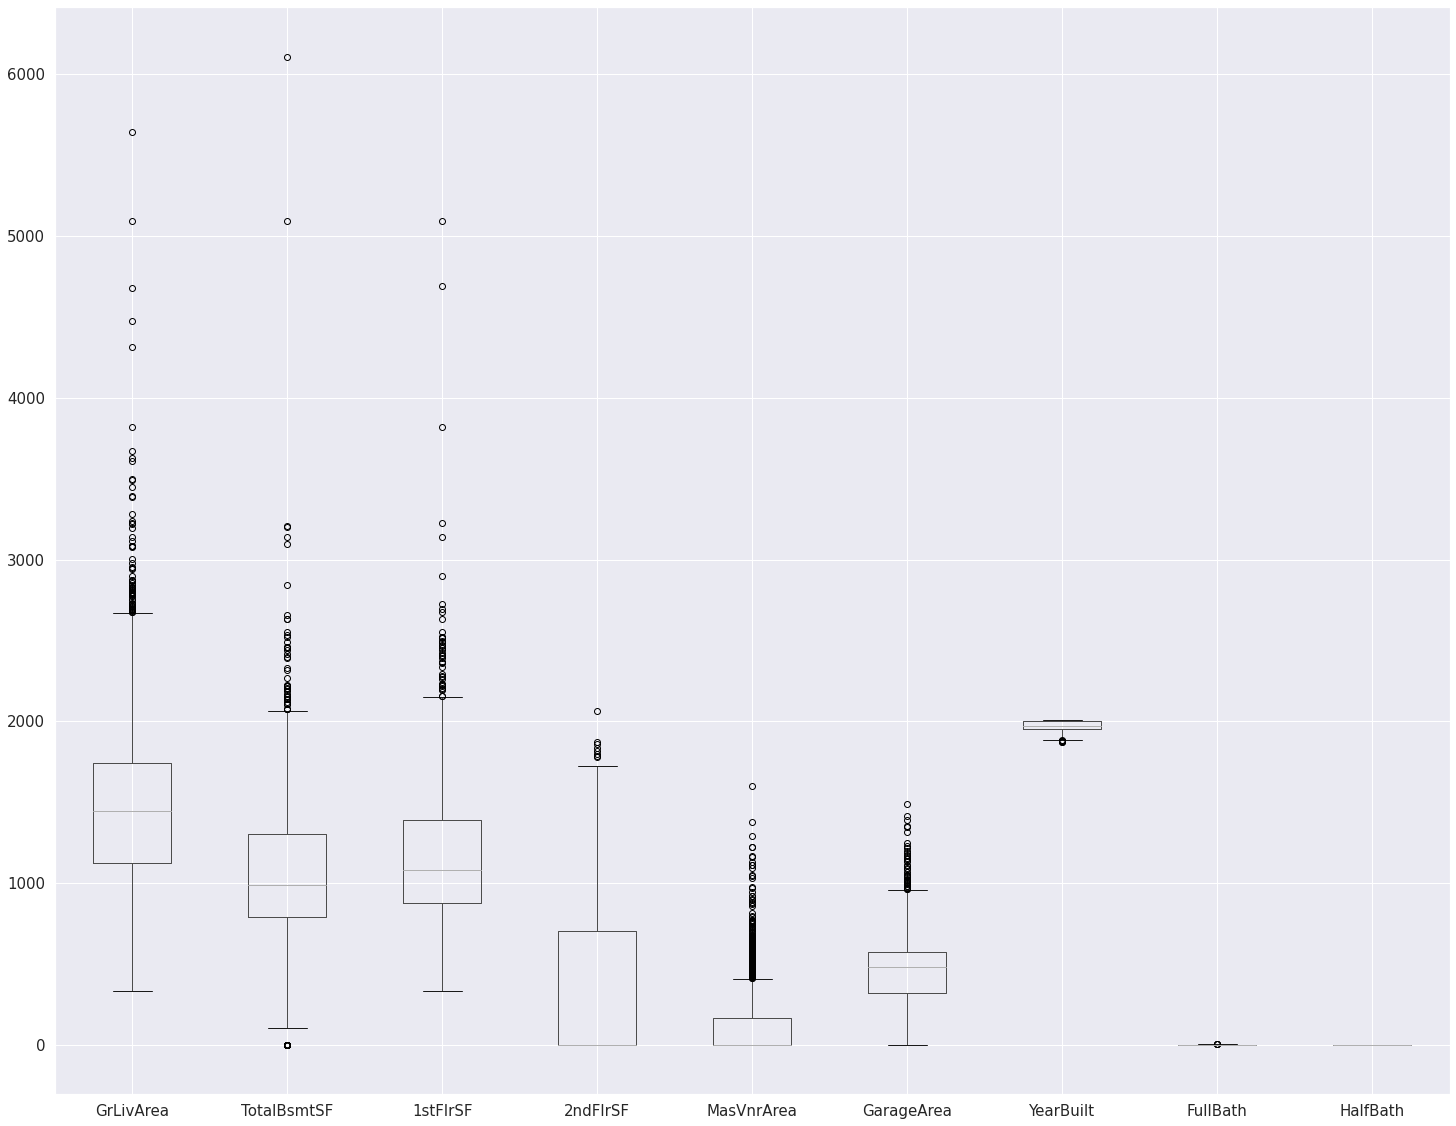

In [22]:
boxplot_comb()

## 1.From above boxplot of "SalePrice" the median is "163000". 
## 1(a).There are many outliers in saleprice ranging from "350000" to "750000"

## 2. In "TotalBsmtSF" there is an outlier of almost '0'sq.ft and highest sq.ft of around '6200'.
## 2(a). The median is around 1000 sq.ft

## 3. In "2ndFlrSF", there is only an upper quartile range from median of "0"sq.ft to upper quartile of around "600-700" sq.ft and having outliers spread around "2000" sq.ft


## Adding All areas(total Bsmtsf, 1stflrsf, garage area, etc) and storing them in a variable called "Total Area". "Feature Engineering"

In [23]:
comb_data['TotalArea'] = comb_data['TotalBsmtSF']+comb_data['GrLivArea']+comb_data['MasVnrArea']+comb_data['1stFlrSF']+comb_data['2ndFlrSF']
comb_data['TotalArea'].fillna(comb_data['TotalArea'].median())

0       4472.0
1       3786.0
2       4654.0
3       4190.0
4       5891.0
         ...  
2914    2730.0
2915    2730.0
2916    3672.0
2917    2852.0
2918    5090.0
Name: TotalArea, Length: 2919, dtype: float64

In [24]:
## probability distribution function manualcode
## a function which describes all possible values and liklihoods that a random value can take

%matplotlib inline

## PDF = [1/(sqrt(2xpi))] x [exp-{(observations - mean)^2/(2 x std.dev^2)}]

const = 1/((np.sqrt(2*np.pi))*(np.std(comb_data['TotalArea'])))
e = np.exp(-np.square(comb_data['TotalArea']-np.mean(comb_data['TotalArea']))/(2*np.square(np.std(comb_data['TotalArea']))))
PDF = const*e
PDF

0       0.000285
1       0.000283
2       0.000273
3       0.000293
4       0.000129
          ...   
2914    0.000170
2915    0.000170
2916    0.000276
2917    0.000186
2918    0.000231
Name: TotalArea, Length: 2919, dtype: float64

In [25]:
##  Cumulative Distributive Function
##  the probability that a random observation that is taken from the population will be less than or equal to a certain value. 
##  with CDF we can calculate P-value(1-CDF) which determines the accepting or rejecting the null hypothesis.

CDF = np.cumsum(PDF)## used built in function
CDF

0       0.000285
1       0.000567
2       0.000841
3       0.001133
4       0.001263
          ...   
2914    0.623173
2915    0.623344
2916    0.623619
2917    0.623806
2918    0.624036
Name: TotalArea, Length: 2919, dtype: float64

## Univariate Distribution of Total Area variable

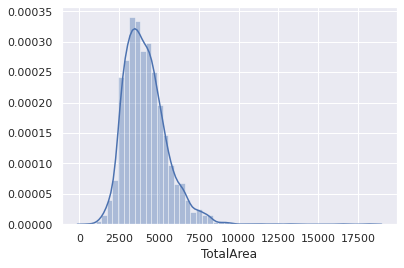

In [26]:
sns.distplot(comb_data['TotalArea'])

In [27]:
## Similarly we can combine Half bath and Fullbath to "Bathrooms",
## yearBuilt, yearremod, garageyrbuilt to "YearAverage"
## then i planned to split the above combined dataset into Numeric and Categorical and 
## clean data sets accordingly.
## By setting threshold to 70%, we can clean the variables having greater than 70% missing values 
## both in numerical and categorical variables.

## After cleaning the data we can treat outliers and then training the model.


In [28]:
pd.reset_option('display.max_rows', None)
comb_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,4472.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,3786.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,4654.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,4190.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,5891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,2730.0
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,2730.0
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,3672.0
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Ga

## Variables and missing values and their percentage in combined train and test data

In [29]:
pd.set_option('display.max_rows', None)
percent = (comb_data.isnull().sum()/(comb_data.isnull().count())).sort_values(ascending = False)
percent

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
LotFrontage      0.166495
GarageQual       0.054471
GarageCond       0.054471
GarageYrBlt      0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtExposure     0.028092
BsmtCond         0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
TotalArea        0.008222
MasVnrArea       0.007879
MSZoning         0.001370
Utilities        0.000685
Functional       0.000685
BsmtFullBath     0.000685
BsmtHalfBath     0.000685
GarageCars       0.000343
BsmtFinSF2       0.000343
Exterior2nd      0.000343
GarageArea       0.000343
TotalBsmtSF      0.000343
BsmtUnfSF        0.000343
BsmtFinSF1       0.000343
Exterior1st      0.000343
KitchenQual      0.000343
SaleType         0.000343
Electrical       0.000343
LandContour      0.000000
LotShape         0.000000
Street           0.000000
LotArea     

## Dropping the variables with missing values greater than 70%

In [30]:
pd.reset_option('display.max_rows', None)
comb_1 = comb_data.dropna(thresh=len(comb_data)*0.7, axis=1)
comb_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,4472.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,3786.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,4654.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,4190.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,5891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,2730.0
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,2730.0
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,3672.0
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,2852.0


In [31]:
print('\n Number of features dropped from combined dataset :', (comb_data.shape[1]-comb_1.shape[1]))
print('\n Shape of combined dataset after dropping variables having missing values greater than 70% :', comb_1.shape)


 Number of features dropped from combined dataset : 5

 Shape of combined dataset after dropping variables having missing values greater than 70% : (2919, 75)


Text(0, 0.5, 'Percentage of missing values')

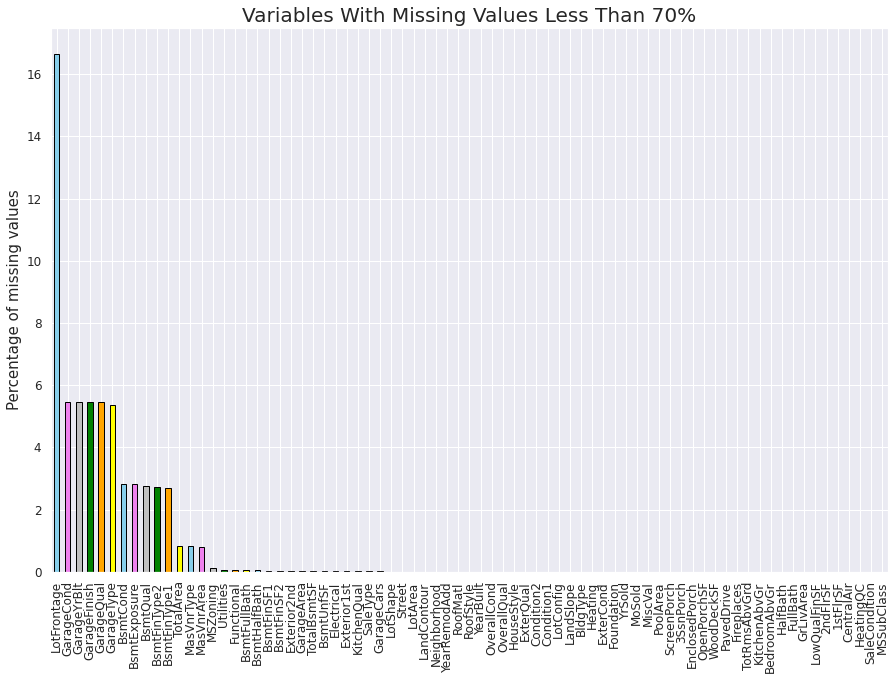

In [32]:
plt.figure(figsize = (15,10))
p = (comb_1.isnull().mean())*100
p.sort_values(ascending = False).plot.bar(color = ('skyblue', 'violet','silver', 'green','orange', 'yellow'), edgecolor = 'black', fontsize = 12)
plt.title('Variables With Missing Values Less Than 70%', fontsize = 20)
plt.ylabel('Percentage of missing values', fontsize = 15)

## Below Vector table shows number of missing values in combined dataset after dropping >70% missing values.

In [33]:
comb_1.select_dtypes(exclude = 'object').isnull().sum().to_frame().sort_values(by=[0]).T

,MSSubClass,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,Fireplaces,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,HalfBath,YrSold,FullBath,LotArea,LowQualFinSF,2ndFlrSF,1stFlrSF,OverallQual,GrLivArea,OverallCond,YearRemodAdd,YearBuilt,GarageArea,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,GarageCars,BsmtFinSF1,BsmtFullBath,BsmtHalfBath,MasVnrArea,TotalArea,GarageYrBlt,LotFrontage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,23,24,159,486


## From above table we can treat variables with single missing values with either      median(if possible) or zero.

## The same is applicable to 2 missing value variables.

## Not Sure whether I can treat categorical variables by filling "None" in place of missing values (or) to use one hot encoding (or) get_dummies functions. 

In [34]:
## All numeric variables are having 0 missing values.
## So if i somehow find appropriate replacement for categorical missing values. we can proceeed to final outlier detection
## and training model.

## Storing all variables with missing values in "allna"

In [35]:
allna = (comb_1.isnull().sum()/len(comb_1)).sort_values(ascending = False)
allna = allna.drop(allna[allna==0].index).sort_values()
NA = comb_1[allna.index.to_list()]
pd.reset_option('display.max_rows', None)
NA

,GarageCars,KitchenQual,Exterior1st,Electrical,BsmtUnfSF,TotalBsmtSF,GarageArea,Exterior2nd,BsmtFinSF2,BsmtFinSF1,SaleType,BsmtHalfBath,BsmtFullBath,Functional,Utilities,MSZoning,MasVnrArea,MasVnrType,TotalArea,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageQual,GarageFinish,GarageYrBlt,GarageCond,LotFrontage
0,2.0,Gd,VinylSd,SBrkr,150.0,856.0,548.0,VinylSd,0.0,706.0,WD,0.0,1.0,Typ,AllPub,RL,196.0,BrkFace,4472.0,GLQ,Unf,Gd,No,TA,Attchd,TA,RFn,2003.0,TA,65.0
1,2.0,TA,MetalSd,SBrkr,284.0,1262.0,460.0,MetalSd,0.0,978.0,WD,1.0,0.0,Typ,AllPub,RL,0.0,None,3786.0,ALQ,Unf,Gd,Gd,TA,Attchd,TA,RFn,1976.0,TA,80.0
2,2.0,Gd,VinylSd,SBrkr,434.0,920.0,608.0,VinylSd,0.0,486.0,WD,0.0,1.0,Typ,AllPub,RL,162.0,BrkFace,4654.0,GLQ,Unf,Gd,Mn,TA,Attchd,TA,RFn,2001.0,TA,68.0
3,3.0,Gd,Wd Sdng,SBrkr,540.0,756.0,642.0,Wd Shng,0.0,216.0,WD,0.0,1.0,Typ,AllPub,RL,0.0,None,4190.0,ALQ,Unf,TA,No,Gd,Detchd,TA,Unf,1998.0,TA,60.0
4,3.0,Gd,VinylSd,SBrkr,490.0,1145.0,836.0,VinylSd,0.0,655.0,WD,0.0,1.0,Typ,AllPub,RL,350.0,BrkFace,5891.0,GLQ,Unf,Gd,Av,TA,Attchd,TA,RFn,2000.0,TA,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,TA,CemntBd,SBrkr,546.0,546.0,0.0,CmentBd,0.0,0.0,WD,0.0,0.0,Typ,AllPub,RM,0.0,None,2730.0,Unf,Unf,TA,No,TA,NaN,NaN,NaN,NaN,NaN,21.0
2915,1.0,TA,CemntBd,SBrkr,294.0,546.0,286.0,CmentBd,0.0,252.0,WD,0.0,0.0,Typ,AllPub,RM,0.0,None,2730.0,Rec,Unf,TA,No,TA,CarPort,TA,Unf,1970.0,TA,21.0
2916,2.0,TA,VinylSd,SBrkr,0.0,1224.0,576.0,VinylSd,0.0,1224.0,WD,0.0,1.0,Typ,AllPub,RL,0.0,None,3672.0,ALQ,Unf,TA,No,TA,Detchd,TA,Unf,1960.0,TA,160.0
2917,0.0,TA,HdBoard,SBrkr,575.0,912.0,0.0,Wd Shng,0.0,337.0,WD,1.0,0.0,Typ,AllPub,RL,0.0,None,2852.0,GLQ,Unf,Gd,Av,TA,NaN,NaN,NaN,NaN,NaN,62.0


In [36]:
NA.select_dtypes(exclude = 'object')

,GarageCars,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,TotalArea,GarageYrBlt,LotFrontage
0,2.0,150.0,856.0,548.0,0.0,706.0,0.0,1.0,196.0,4472.0,2003.0,65.0
1,2.0,284.0,1262.0,460.0,0.0,978.0,1.0,0.0,0.0,3786.0,1976.0,80.0
2,2.0,434.0,920.0,608.0,0.0,486.0,0.0,1.0,162.0,4654.0,2001.0,68.0
3,3.0,540.0,756.0,642.0,0.0,216.0,0.0,1.0,0.0,4190.0,1998.0,60.0
4,3.0,490.0,1145.0,836.0,0.0,655.0,0.0,1.0,350.0,5891.0,2000.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,546.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0,2730.0,NaN,21.0
2915,1.0,294.0,546.0,286.0,0.0,252.0,0.0,0.0,0.0,2730.0,1970.0,21.0
2916,2.0,0.0,1224.0,576.0,0.0,1224.0,0.0,1.0,0.0,3672.0,1960.0,160.0
2917,0.0,575.0,912.0,0.0,0.0,337.0,1.0,0.0,0.0,2852.0,NaN,62.0


## Replacing "Total Area, Garage yearbuilt(year cannot be zero), LotFrontage" with median because these cannot be zero. So I replaced them with their median respectively. All the other Numeric missing values can be filled with zero.

## For example,"GarageCars" can have zeros because it is evident that many houses do not have garages. so we cannot fill them with medians. 

In [37]:
COL = ['TotalArea', 'LotFrontage', 'GarageYrBlt','MasVnrArea']## storing 3 variables in a temp array.

for c in COL:
    NA[c] = NA[c].fillna(NA[c].median())
   
NA

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,GarageCars,KitchenQual,Exterior1st,Electrical,BsmtUnfSF,TotalBsmtSF,GarageArea,Exterior2nd,BsmtFinSF2,BsmtFinSF1,SaleType,BsmtHalfBath,BsmtFullBath,Functional,Utilities,MSZoning,MasVnrArea,MasVnrType,TotalArea,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageQual,GarageFinish,GarageYrBlt,GarageCond,LotFrontage
0,2.0,Gd,VinylSd,SBrkr,150.0,856.0,548.0,VinylSd,0.0,706.0,WD,0.0,1.0,Typ,AllPub,RL,196.0,BrkFace,4472.0,GLQ,Unf,Gd,No,TA,Attchd,TA,RFn,2003.0,TA,65.0
1,2.0,TA,MetalSd,SBrkr,284.0,1262.0,460.0,MetalSd,0.0,978.0,WD,1.0,0.0,Typ,AllPub,RL,0.0,None,3786.0,ALQ,Unf,Gd,Gd,TA,Attchd,TA,RFn,1976.0,TA,80.0
2,2.0,Gd,VinylSd,SBrkr,434.0,920.0,608.0,VinylSd,0.0,486.0,WD,0.0,1.0,Typ,AllPub,RL,162.0,BrkFace,4654.0,GLQ,Unf,Gd,Mn,TA,Attchd,TA,RFn,2001.0,TA,68.0
3,3.0,Gd,Wd Sdng,SBrkr,540.0,756.0,642.0,Wd Shng,0.0,216.0,WD,0.0,1.0,Typ,AllPub,RL,0.0,None,4190.0,ALQ,Unf,TA,No,Gd,Detchd,TA,Unf,1998.0,TA,60.0
4,3.0,Gd,VinylSd,SBrkr,490.0,1145.0,836.0,VinylSd,0.0,655.0,WD,0.0,1.0,Typ,AllPub,RL,350.0,BrkFace,5891.0,GLQ,Unf,Gd,Av,TA,Attchd,TA,RFn,2000.0,TA,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,TA,CemntBd,SBrkr,546.0,546.0,0.0,CmentBd,0.0,0.0,WD,0.0,0.0,Typ,AllPub,RM,0.0,None,2730.0,Unf,Unf,TA,No,TA,NaN,NaN,NaN,1979.0,NaN,21.0
2915,1.0,TA,CemntBd,SBrkr,294.0,546.0,286.0,CmentBd,0.0,252.0,WD,0.0,0.0,Typ,AllPub,RM,0.0,None,2730.0,Rec,Unf,TA,No,TA,CarPort,TA,Unf,1970.0,TA,21.0
2916,2.0,TA,VinylSd,SBrkr,0.0,1224.0,576.0,VinylSd,0.0,1224.0,WD,0.0,1.0,Typ,AllPub,RL,0.0,None,3672.0,ALQ,Unf,TA,No,TA,Detchd,TA,Unf,1960.0,TA,160.0
2917,0.0,TA,HdBoard,SBrkr,575.0,912.0,0.0,Wd Shng,0.0,337.0,WD,1.0,0.0,Typ,AllPub,RL,0.0,None,2852.0,GLQ,Unf,Gd,Av,TA,NaN,NaN,NaN,1979.0,NaN,62.0


## Similarly we can drop above variables in COL in main combined dataset as follows:
## Where, comb_1 => combined train and test dataset after treating missing values        >70%
##  NA = Temporary dataset which contain all missing values

## objective is "NA" should also contain zero missing values.

## Below steps is aimed to completely fill missing values in numerics of both "NA" and "comb_1" datasets.

In [38]:
for c in COL:
    comb_1[c] = comb_1[c].fillna(comb_1[c].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Storing And Removing remaining variables of numeric variables with missing values
## in both "NA" and "combined dataset"

In [39]:
COL_2 = ['GarageCars', 'BsmtUnfSF','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtFinSF1','BsmtHalfBath','BsmtFullBath']

for e in COL_2:
    NA[e] = NA[e].fillna(0)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
for f in COL_2:
    comb_1[f] = comb_1[f].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Numeric variables missing values in "NA" dataset after replacing and treating

In [41]:
NA_temp = NA.select_dtypes(exclude = 'object').isnull().sum().to_frame().sort_values(by = [0]).T
NA_temp

,GarageCars,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,TotalArea,GarageYrBlt,LotFrontage
0,0,0,0,0,0,0,0,0,0,0,0,0


## Numeric variables missing values in "Comb_1" dataset after replacing and treating

In [42]:
comb_1.select_dtypes(exclude = 'object').isnull().sum().to_frame().sort_values(by=[0]).T

,MSSubClass,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HalfBath,YrSold,FullBath,BsmtFullBath,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,TotalArea
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
## From Above two palletes it is evident that all missing values related to numeric variables in both "NA" and "Comb_1"
## are completely replaced and filled.

## Next steps are based on treating missing values in categorical datasets of both "NA" and "Comb_1"

## The correlation between "Grliv area" and "Tot rms abov grnd" is same and I will drop "tot rms abov grnd". since i have already
## included Grliv Area in Total Area. So i think it may again lead to ambiguity. 

In [44]:
NA.select_dtypes(include = 'object').isnull().sum().to_frame().sort_values(by=[0]).T

,KitchenQual,Exterior1st,Electrical,Exterior2nd,SaleType,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageQual,GarageFinish,GarageCond
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


## Storing ALL Categorical Variables in seperated array (COL_3)

In [45]:
COL_3 = ['KitchenQual', 'Exterior1st', 'Electrical', 'Exterior2nd',
       'SaleType', 'Functional', 'Utilities', 'MSZoning', 'MasVnrType',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtExposure',
       'BsmtCond', 'GarageType', 'GarageQual', 'GarageFinish',
       'GarageCond']

## Verifying combined dataset for missing values in categorical Variables

In [46]:
comb_1.select_dtypes(include = 'object').isnull().sum().to_frame().sort_values(by = [0]).T

,ExterCond,PavedDrive,CentralAir,HeatingQC,Heating,Foundation,ExterQual,RoofMatl,RoofStyle,HouseStyle,SaleCondition,Condition2,Condition1,Neighborhood,Street,LandSlope,LotConfig,LotShape,BldgType,LandContour,Exterior1st,Exterior2nd,SaleType,KitchenQual,Electrical,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageFinish,GarageQual,GarageCond
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


## Verifying NA dataset for missing values in Categorical Variables

In [47]:

NA.select_dtypes(include = 'object').isnull().sum().to_frame().sort_values(by=[0]).T 

,KitchenQual,Exterior1st,Electrical,Exterior2nd,SaleType,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageQual,GarageFinish,GarageCond
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [48]:
NA.select_dtypes(include = 'object')

,KitchenQual,Exterior1st,Electrical,Exterior2nd,SaleType,Functional,Utilities,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageQual,GarageFinish,GarageCond
0,Gd,VinylSd,SBrkr,VinylSd,WD,Typ,AllPub,RL,BrkFace,GLQ,Unf,Gd,No,TA,Attchd,TA,RFn,TA
1,TA,MetalSd,SBrkr,MetalSd,WD,Typ,AllPub,RL,None,ALQ,Unf,Gd,Gd,TA,Attchd,TA,RFn,TA
2,Gd,VinylSd,SBrkr,VinylSd,WD,Typ,AllPub,RL,BrkFace,GLQ,Unf,Gd,Mn,TA,Attchd,TA,RFn,TA
3,Gd,Wd Sdng,SBrkr,Wd Shng,WD,Typ,AllPub,RL,None,ALQ,Unf,TA,No,Gd,Detchd,TA,Unf,TA
4,Gd,VinylSd,SBrkr,VinylSd,WD,Typ,AllPub,RL,BrkFace,GLQ,Unf,Gd,Av,TA,Attchd,TA,RFn,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,TA,CemntBd,SBrkr,CmentBd,WD,Typ,AllPub,RM,None,Unf,Unf,TA,No,TA,NaN,NaN,NaN,NaN
2915,TA,CemntBd,SBrkr,CmentBd,WD,Typ,AllPub,RM,None,Rec,Unf,TA,No,TA,CarPort,TA,Unf,TA
2916,TA,VinylSd,SBrkr,VinylSd,WD,Typ,AllPub,RL,None,ALQ,Unf,TA,No,TA,Detchd,TA,Unf,TA
2917,TA,HdBoard,SBrkr,Wd Shng,WD,Typ,AllPub,RL,None,GLQ,Unf,Gd,Av,TA,NaN,NaN,NaN,NaN


## If we observe the above data set there are 6("KitchenQual", "BsmtQual", "BsmtExposure","BsmtCond","GarageQual","GarageCond") variables whose data is in the form of Ratings i.e (Gd = good, TA = typical/Average, na = not available).


## So, I will segregate them into seperate variable and assign them with ratings from  (1 to 5). By doing so We can either merge them to numeric variable dataset or can visualize more efficiently by using correlation matrix, boxplots etc. 

In [49]:
Ratings = pd.DataFrame(NA['KitchenQual'], columns = ['KitchenQual'])

In [50]:
Ratings['BsmtQual'] = NA['BsmtQual']
Ratings['BsmtCond'] = NA['BsmtCond']
Ratings['BsmtExposure'] = NA['BsmtExposure']
Ratings['GarageQual'] = NA['GarageQual']
Ratings['GarageCond'] = NA['GarageCond']

In [51]:
Ratings

,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond
0,Gd,Gd,TA,No,TA,TA
1,TA,Gd,TA,Gd,TA,TA
2,Gd,Gd,TA,Mn,TA,TA
3,Gd,TA,Gd,No,TA,TA
4,Gd,Gd,TA,Av,TA,TA
...,...,...,...,...,...,...
2914,TA,TA,TA,No,NaN,NaN
2915,TA,TA,TA,No,TA,TA
2916,TA,TA,TA,No,TA,TA
2917,TA,Gd,TA,Av,NaN,NaN


## Using map function to map respective strings with numeric values

In [52]:
Ratings['KitchenQual'] = Ratings['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})


In [53]:
COL_Rate = ['BsmtQual','BsmtCond','GarageQual','GarageCond']

for g in COL_Rate:
    Ratings[g] = Ratings[g].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [54]:
Ratings

,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond
0,4.0,4.0,3.0,No,3.0,3.0
1,3.0,4.0,3.0,Gd,3.0,3.0
2,4.0,4.0,3.0,Mn,3.0,3.0
3,4.0,3.0,4.0,No,3.0,3.0
4,4.0,4.0,3.0,Av,3.0,3.0
...,...,...,...,...,...,...
2914,3.0,3.0,3.0,No,NaN,NaN
2915,3.0,3.0,3.0,No,3.0,3.0
2916,3.0,3.0,3.0,No,3.0,3.0
2917,3.0,4.0,3.0,Av,NaN,NaN


In [55]:
Ratings['BsmtExposure'] = Ratings['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

## There are some missing values in Ratings dataset as shown below

In [56]:
Ratings

,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond
0,4.0,4.0,3.0,1.0,3.0,3.0
1,3.0,4.0,3.0,4.0,3.0,3.0
2,4.0,4.0,3.0,2.0,3.0,3.0
3,4.0,3.0,4.0,1.0,3.0,3.0
4,4.0,4.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...
2914,3.0,3.0,3.0,1.0,NaN,NaN
2915,3.0,3.0,3.0,1.0,3.0,3.0
2916,3.0,3.0,3.0,1.0,3.0,3.0
2917,3.0,4.0,3.0,3.0,NaN,NaN


## Replacing missing values in Ratings Dataset

In [57]:
temp = Ratings.columns.values
for h in temp:
    Ratings[h] = Ratings[h].fillna(0)

## Replaced Missing values

In [58]:
Ratings.isnull().sum().to_frame().sort_values(by=[0]).T

,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond
0,0,0,0,0,0,0


## Final Ratings Dataset after filling missing values and converting string to respective numbers

In [59]:
Ratings

,KitchenQual,BsmtQual,BsmtCond,BsmtExposure,GarageQual,GarageCond
0,4.0,4.0,3.0,1.0,3.0,3.0
1,3.0,4.0,3.0,4.0,3.0,3.0
2,4.0,4.0,3.0,2.0,3.0,3.0
3,4.0,3.0,4.0,1.0,3.0,3.0
4,4.0,4.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...
2914,3.0,3.0,3.0,1.0,0.0,0.0
2915,3.0,3.0,3.0,1.0,3.0,3.0
2916,3.0,3.0,3.0,1.0,3.0,3.0
2917,3.0,4.0,3.0,3.0,0.0,0.0


## Updating Actual "NA" dataset with converted variables

In [60]:
NA['KitchenQual'] = Ratings['KitchenQual']
NA['BsmtQual'] = Ratings['BsmtQual']
NA['BsmtCond'] = Ratings['BsmtQual']
NA['BsmtExposure'] = Ratings['BsmtExposure']
NA['GarageQual'] = Ratings['GarageQual']
NA['GarageCond'] = Ratings['GarageQual']
NA.select_dtypes(exclude = 'object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,GarageCars,KitchenQual,BsmtUnfSF,TotalBsmtSF,GarageArea,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,TotalArea,BsmtQual,BsmtExposure,BsmtCond,GarageQual,GarageYrBlt,GarageCond,LotFrontage
0,2.0,4.0,150.0,856.0,548.0,0.0,706.0,0.0,1.0,196.0,4472.0,4.0,1.0,4.0,3.0,2003.0,3.0,65.0
1,2.0,3.0,284.0,1262.0,460.0,0.0,978.0,1.0,0.0,0.0,3786.0,4.0,4.0,4.0,3.0,1976.0,3.0,80.0
2,2.0,4.0,434.0,920.0,608.0,0.0,486.0,0.0,1.0,162.0,4654.0,4.0,2.0,4.0,3.0,2001.0,3.0,68.0
3,3.0,4.0,540.0,756.0,642.0,0.0,216.0,0.0,1.0,0.0,4190.0,3.0,1.0,3.0,3.0,1998.0,3.0,60.0
4,3.0,4.0,490.0,1145.0,836.0,0.0,655.0,0.0,1.0,350.0,5891.0,4.0,3.0,4.0,3.0,2000.0,3.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,3.0,546.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0,2730.0,3.0,1.0,3.0,0.0,1979.0,0.0,21.0
2915,1.0,3.0,294.0,546.0,286.0,0.0,252.0,0.0,0.0,0.0,2730.0,3.0,1.0,3.0,3.0,1970.0,3.0,21.0
2916,2.0,3.0,0.0,1224.0,576.0,0.0,1224.0,0.0,1.0,0.0,3672.0,3.0,1.0,3.0,3.0,1960.0,3.0,160.0
2917,0.0,3.0,575.0,912.0,0.0,0.0,337.0,1.0,0.0,0.0,2852.0,4.0,3.0,4.0,0.0,1979.0,0.0,62.0


## Updating Actual combined dataset with converted variables

In [61]:
comb_1['KitchenQual'] = Ratings['KitchenQual']
comb_1['BsmtQual'] = Ratings['BsmtQual']
comb_1['BsmtCond'] = Ratings['BsmtQual']
comb_1['BsmtExposure'] = Ratings['BsmtExposure']
comb_1['GarageQual'] = Ratings['GarageQual']
comb_1['GarageCond'] = Ratings['GarageQual']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [62]:
NA.select_dtypes(exclude = 'object').isnull().sum().to_frame().sort_values(by=[0]).T

,GarageCars,GarageYrBlt,GarageQual,BsmtCond,BsmtExposure,BsmtQual,TotalArea,MasVnrArea,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,GarageArea,TotalBsmtSF,BsmtUnfSF,KitchenQual,GarageCond,LotFrontage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
comb_1.select_dtypes(exclude = 'object').isnull().sum().to_frame().sort_values(by=[0]).T

,MSSubClass,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,HalfBath,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,GarageCond,YrSold,FullBath,BsmtFullBath,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtHalfBath,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtExposure,TotalArea
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
## From the above steps i have successfully converted some categorical variables with Rating charecteristics into numeric variables.
## Will visualize other such variables and do the same thing. 
## Also successfully replaced missing values in "NA" and "comb_1" Data sets.

In [65]:
NA.select_dtypes(include = 'object').isnull().sum()

Exterior1st       1
Electrical        1
Exterior2nd       1
SaleType          1
Functional        2
Utilities         2
MSZoning          4
MasVnrType       24
BsmtFinType1     79
BsmtFinType2     80
GarageType      157
GarageFinish    159
dtype: int64

In [66]:
COL_4 = ['Exterior1st','Exterior2nd','Electrical','SaleType','Functional','Utilities','MSZoning','MasVnrType','BsmtFinType1',
        'BsmtFinType2','GarageType','GarageFinish']

for i in COL_4:
    NA[i] = NA[i].fillna("None")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
NA.isnull().sum().to_frame().sort_values(by=[0]).T

,GarageCars,GarageYrBlt,GarageFinish,GarageQual,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,TotalArea,MasVnrType,MasVnrArea,MSZoning,Utilities,Functional,BsmtFullBath,BsmtHalfBath,SaleType,BsmtFinSF1,BsmtFinSF2,Exterior2nd,GarageArea,TotalBsmtSF,BsmtUnfSF,Electrical,Exterior1st,KitchenQual,GarageCond,LotFrontage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
for j in COL_4:
    comb_1[j] = comb_1[j].fillna("None")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Combined data set after treating all missing values (both numeric and categorical types). Can be used to detect outliers. 


In [69]:
comb_1.isnull().sum().to_frame().sort_values(by=[0]).T

,MSSubClass,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,Electrical,CentralAir,Fireplaces,HeatingQC,GarageType,GarageFinish,SaleType,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,GarageCond,GarageQual,GarageArea,GarageCars,GarageYrBlt,SaleCondition,Heating,BsmtUnfSF,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,Utilities,LandContour,LotShape,Street,LotArea,LotFrontage,MSZoning,OverallCond,TotalBsmtSF,YearBuilt,RoofStyle,BsmtFinSF2,BsmtFinType2,BsmtFinSF1,BsmtFinType1,BsmtExposure,BsmtCond,BsmtQual,Foundation,ExterCond,ExterQual,MasVnrArea,MasVnrType,Exterior2nd,Exterior1st,RoofMatl,YearRemodAdd,TotalArea
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Hence our goal of filling missing values of numeric and categorical variables of both "NA" and "comb_1" is achieved.

## Hence the treated combined data set is ready for outlier detection and encoding of categorical variables.

In [70]:
comb_1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,4.0,1.0,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,4.0,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,3.0,3.0,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,4472.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,4.0,4.0,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3.0,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,3.0,3.0,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,3786.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,4.0,2.0,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,4.0,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,3.0,3.0,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,4654.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,3.0,1.0,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,4.0,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,3.0,3.0,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,4190.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,4.0,3.0,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,4.0,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,3.0,3.0,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,5891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,3.0,3.0,1.0,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,5,Typ,0,None,1979.0,None,0.0,0.0,0.0,0.0,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,2730.0
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,3.0,3.0,1.0,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3.0,6,Typ,0,CarPort,1970.0,Unf,1.0,286.0,3.0,3.0,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,2730.0
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,3.0,3.0,1.0,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3.0,7,Typ,1,Detchd,1960.0,Unf,2.0,576.0,3.0,3.0,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,3672.0
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,4.0,4.0,3.0,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3.0,6,Typ,0,None,1979.0,None,0.0,0.0

## Storing treated combined data(comb_1) set seperately for backup and contingency purposes.

In [71]:
comb_backup = comb_1

## Assigning Dummy Values to combined data set categorical variables

In [72]:
comb_1_enc = pd.get_dummies(comb_1)
print('\n Shape of combined data set before encoding:',comb_1.shape)
print('\n Shape of combined data set after encoding:',comb_1_enc.shape)
print('\n No. of Newly Encoded Variables:', comb_1_enc.shape[1]-comb_1.shape[1])


 Shape of combined data set before encoding: (2919, 75)

 Shape of combined data set after encoding: (2919, 262)

 No. of Newly Encoded Variables: 187


## Splitting the Combined data set into train and test data sets

In [73]:
train_fin = comb_1_enc[:na]
test_fin = comb_1_enc[na:]

## Overview of train data set without missing values.

In [74]:
train_fin

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sal

## Overview of Test data set without missing values

In [75]:
test_fin

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sal

In [76]:
def correlation():
    sx = np.std(train_fin['BsmtExposure'])## Standard deviation of BsmtExposure
    sy = np.std(numeric_df['SalePrice'])  ## Standard deviation of SalePrice
    n = numeric_df['Id'].count()
    
    mean_x = np.mean(train_fin['BsmtExposure'])
    mean_y = np.mean(numeric_df['SalePrice'])
    
    sigma_x = train_fin['BsmtExposure'] - mean_x ## Difference between observed value and mean of BsmtExposure variable
    sigma_y = numeric_df['SalePrice'] - mean_y   ## Difference between observed value and mean of SalePrice variable
   
    ## Correlation coeff = [1/(no.of observations -1)] x [1/(std.deviation 0f 2 vars)] x 
    ## ['sum of {(observed value of var1 - mean of var1) x (observed value of var2 - mean of var2)]
    
    Correlation = (1/(n-1))*(1/(sx*sy))*((sigma_x)*(sigma_y))
    print('\n Correlation coeff between BsmtExposure and SalePrice is :', Correlation.sum().round(5))

In [77]:
correlation()


 Correlation coeff between BsmtExposure and SalePrice is : 0.37495


## Plotting scatter plots to check for Outliers:

In [78]:
def outliers():
    fig = plt.figure(figsize = (20,20))
    ax1 = plt.subplot2grid((5,3),(0,0))
    plt.scatter(x = train_fin['GrLivArea'], y = train['SalePrice'], color = 'skyblue')
    plt.axvline(x = 4500, color = 'red')
    plt.title('Ground Liv Area and SalePrice Scatter Plot')

    ax1 = plt.subplot2grid((5,3), (0,1))
    plt.scatter(x = train_fin['TotalBsmtSF'], y = train['SalePrice'], color = 'violet')
    plt.axvline(x = 5500, color = 'red')
    plt.title('Total basement area and SalePrice Scatter Plot')

    ax1 = plt.subplot2grid((5,3), (1,0))
    plt.scatter(x = train_fin['1stFlrSF'], y = train['SalePrice'], color = 'green')
    plt.axvline(x = 4500, color = 'red')
    plt.title('Total 1stfloor area and SalePrice Scatter Plot')

    ax1 = plt.subplot2grid((5,3), (1,1))
    plt.scatter(x = train_fin['2ndFlrSF'], y = train['SalePrice'], color = 'orange')
    plt.title('Total 2ndfloor area and SalePrice Scatter Plot')

    ax1 = plt.subplot2grid((5,3), (2,0))
    plt.scatter(x = train_fin['MasVnrArea'], y = train['SalePrice'], color = 'blue')
    plt.axvline(x = 1400, color = 'red')
    plt.title('Total Masonry Veneer area - SalePrice Scatter Plot')

    ax1 = plt.subplot2grid((5,3), (2,1))
    plt.scatter(x = train_fin['GarageArea'], y = train['SalePrice'], color = 'purple')
    plt.axvline(x = 1235, color = 'red')
    plt.title('Total Garage Area - SalePrice Scatter Plot')

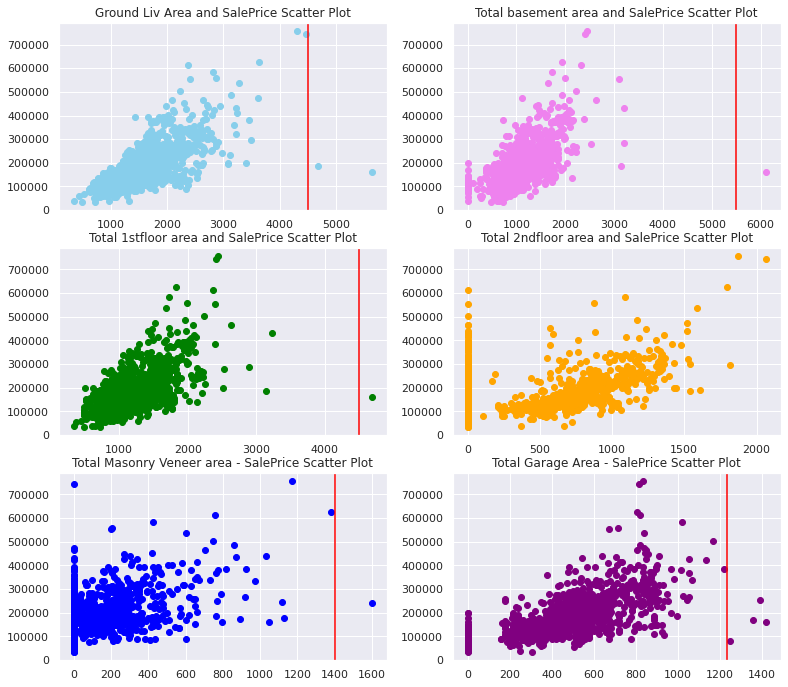

In [79]:
outliers()

## From above plots, all variables except(2ndFlrSF) has outliers. 

In [80]:
## Fucntion to display Outliers in suspected variables

COL_5 = ['TotalBsmtSF','1stFlrSF','MasVnrArea']
def Outlier_indexes():
    for k in COL_5:
        print('\n', train_fin[k].sort_values(ascending = False).head(1))

    print('\n GrLivArea Outliers', train['GrLivArea'].sort_values(ascending = False).head(2))
    print('\n GarageArea Outliers', train['GarageArea'].sort_values(ascending = False).head(4))


## Variables with Outliers and their respective indexes(i.e row numbers)

In [81]:
Outlier_indexes()


 1298    6110.0
Name: TotalBsmtSF, dtype: float64

 1298    4692
Name: 1stFlrSF, dtype: int64

 297    1600.0
Name: MasVnrArea, dtype: float64

 GrLivArea Outliers 1298    5642
523     4676
Name: GrLivArea, dtype: int64

 GarageArea Outliers 1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64


## 1. Removing 2 outliers in "GrLivArea" and 4 outliers in "GarageArea" 

In [82]:
train_nout = train_fin[(train_fin['GrLivArea']<4600) & (train_fin['GarageArea']<1236)]
print('\n number of outLiers removed: ', (train_fin.shape[0]-train_nout.shape[0]))


 number of outLiers removed:  5


## Removing 1 Outlier in "MasVnrArea"

In [83]:
train_nout = train_nout[(train_nout['1stFlrSF']<4500) & (train_nout['MasVnrArea']<1500)]
print('\n Total Number Of Outliers Removed : ', (train_fin.shape[0]-train_nout.shape[0]))


 Total Number Of Outliers Removed :  6


## Final train dataset(train_nout) after removing major outliers


In [84]:
train_nout

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_None,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,Sal

## Similarly, From above indexes having major outliers we can use those index numbers to remove corresponding Saleprice(stored in seperate set called "target")

In [85]:
target = train[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [86]:
ind = [1298, 523, 297, 581, 1190, 1061]## index numbers with major outliers which are already available in above outlier removing steps

## dropping the corresponding indexes having major outliers

target.drop(target.index[ind], inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Final shape of data sets after cleaning, replacing missing values and removing Outliers:

In [87]:
print('\n Final Shape of Train without Outliers:',train_nout.shape[0])

print('\n Final Shape of Target without Outliers:', target.shape[0])


 Final Shape of Train without Outliers: 1454

 Final Shape of Target without Outliers: 1454


In [88]:
## From the above steps I am able to remove the major problematic Outliers 
## particularly present in variables related to Areas of Houses in train data set(having "1454 rows").
## But the actual test data set upon which we have to test and finalize the model's result has "1459 rows".


## verifying Data distributions 

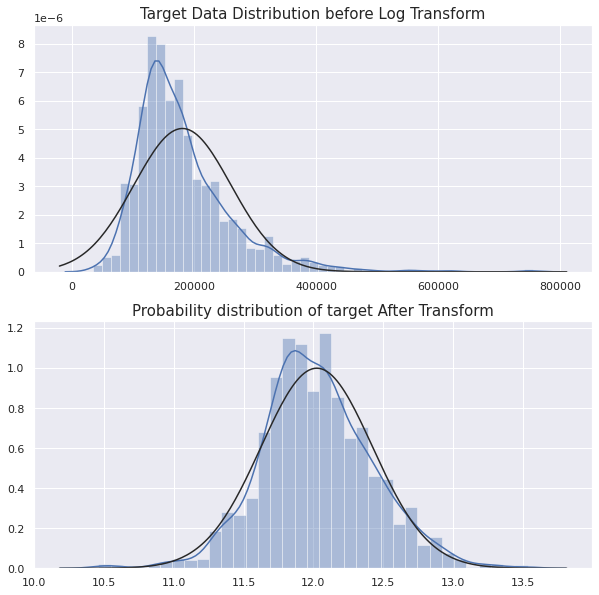

In [89]:
from scipy.stats import norm
from scipy import stats

fig = plt.figure(figsize = (10,10))

ax1 = plt.subplot2grid((2,1),(0,0))
plt.title('Target Data Distribution before Log Transform', fontsize = 15)
sns.distplot(y_train, fit=norm)

target = np.log1p(target)

ax1 = plt.subplot2grid((2,1),(1,0))
plt.title('Probability distribution of target After Transform', fontsize = 15)
sns.distplot(target, fit = norm)


## Skewness and Kurtosis of Target variable(SalePrice) before and after Log Transformation

In [90]:
from scipy.stats import skew, kurtosis
print('\n Skewness of target before Log Transformation:', y_train.skew())
print('\n kurtosis of target before Log Transformation:', y_train.kurtosis())
print('\n Skewness of target After Log Transformation:', target.skew())
print('\n kurtosis of target After Log Transformation:', target.kurtosis())


 Skewness of target before Log Transformation: SalePrice    1.882876
dtype: float64

 kurtosis of target before Log Transformation: SalePrice    6.536282
dtype: float64

 Skewness of target After Log Transformation: SalePrice    0.125163
dtype: float64

 kurtosis of target After Log Transformation: SalePrice    0.812831
dtype: float64


## Assigning Cleaned dataset to train, test and target datasets respectively

In [91]:
x = train_nout
y = target
print('\n Train_nout shape:', x.shape)
print('\n Target Shape:', y.shape)
print('\n Test shape:', test_fin.shape)


 Train_nout shape: (1454, 262)

 Target Shape: (1454, 1)

 Test shape: (1459, 262)


## Splitting the input(x) and output(y) data into train and test data

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5 )

## Standardizing the train and final test(test_fin) data sets using Robust scaler

In [93]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

## transforming train and test subsets 
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Transforming actual test set
test_scal = scaler.fit_transform(test_fin)

## Basic Linear Regression and validation with RMSE scores

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
## Using cross validation method to evaluate model(the model is trained on subsets and evaluated on different subset that model has not seen
## this steps or folds are repeated)

MSE = cross_val_score(linreg, x, y, scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE = np.mean(MSE)

## Here neg_mean_squared error is selected as reference from sklearn website(Appropriate for regression problems)

print(mean_MSE)
print('\n RMSE : ', np.sqrt(-mean_MSE))

-4711781.910112228

 RMSE :  2170.6639330196253


## REGULARIZATION: 
## In order to reduce the overfitting of the model, we use a technique called regularization which penalizes or shrinks or reduces the coeeficients nearer to zero(In other words, the more complex the model trains the more it gets penalized or regularized.
## Common Types of Regularization techniques are:
## 1. Ridge 
## 2. Lasso
## 3. Elastic Net


In [95]:
import sklearn.model_selection as ms
from sklearn.linear_model import Ridge
import sklearn.model_selection as GridSearchCV

ridge = Ridge()
parameters = {'alpha': [x for x in range(1,200)]}

ridge_reg = ms.GridSearchCV(ridge, param_grid = parameters, scoring = 'neg_mean_squared_error', cv = 15)
ridge_reg.fit(x_train,y_train)

print('\n Best value of Alpha is : ', ridge_reg.best_params_)
print('\n Best score achieved : ', np.sqrt(-ridge_reg.best_score_))


 Best value of Alpha is :  {'alpha': 10}

 Best score achieved :  0.11513099836295201


In [96]:
ridge_mod = Ridge(alpha = 10)
ridge_mod.fit(x_train,y_train)
y_pred_train = ridge_mod.predict(x_train)
y_pred_test = ridge_mod.predict(x_test)

print('\RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('\n RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

\RMSE:  0.09679047661546189

 RMSE :  0.11068637713145946


In [97]:
from xgboost.sklearn import XGBRegressor


In [98]:
xgb = XGBRegressor(n_estimators = 5000, verbosity = 1)
xg_reg = xgb.fit(x_train,y_train)
xg_predict = xg_reg.predict(x_test)

print('\n RMSE : ', np.sqrt(mean_squared_error(y_test,xg_predict)))


 RMSE :  0.12601291540301662


In [99]:
from mlxtend.regressor import StackingRegressor

st_reg = StackingRegressor(regressors = [ridge_mod], meta_regressor = xgb, use_features_in_secondary = True)

stack_mod = st_reg.fit(x_train,y_train)
stack_predict = stack_mod.predict(x_test)

print('\n RMSE :', np.sqrt(mean_squared_error(y_test, stack_predict)))


 RMSE : 0.1231984434856505


In [100]:
Stacking_regressor = st_reg.predict(test_scal)
final = np.expm1(Stacking_regressor)

In [101]:
final

array([135261.8 , 151929.73, 192452.19, ..., 182224.28, 127476.52,
       223275.88], dtype=float32)

In [102]:
final.shape

(1459,)

In [103]:
Sub_9 = pd.DataFrame({'Id': test['Id'], 'SalePrice': final})
Sub_9.to_csv('Sub_9.csv', index = False)
pd.set_option('display.max_rows', None)
Sub_9

,Id,SalePrice
0,1461,135261.796875
1,1462,151929.734375
2,1463,192452.187500
3,1464,214550.531250
4,1465,197484.312500
5,1466,176009.265625
6,1467,173639.781250
7,1468,173992.875000
8,1469,199601.562500
9,1470,137611.250000
